In [29]:
import os
from sklearn import datasets
import pandas as pd
import dask.dataframe as dd
from pathlib import Path

In [30]:
HOME_Path = Path(os.getcwd()).parent
data_Path = HOME_Path / "data"

# Load Iris dataset

In [67]:
iris = datasets.load_iris()

In [12]:
columns = [
    "sepal length (cm)",
    "sepal width (cm)",
    "petal length (cm)",
    "petal width (cm)"
]

df = pd.DataFrame(data=iris.data,
                  columns=columns,
                 )

In [13]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [15]:
len(df)

150

## Save as CSV

In [31]:
df.to_csv(path_or_buf=str(data_Path / "iris.csv"))

# Load with DASK

## Pandas to Dask

In [68]:
ddf1 = dd.from_pandas(data=df, npartitions=2)

In [69]:
ddf1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [72]:
# 分割された分かれ目を確認
ddf1.divisions

(0, 75, 149)

In [73]:
# 分割数を確認
ddf1.npartitions

2

## Load CSV with DASK

In [74]:
ddf2 = dd.read_csv(urlpath=str(data_Path / "iris.csv"), blocksize=1500,)

In [75]:
ddf2.npartitions

2

# dask.datafram.mean()

## mean

In [76]:
ddf2.mean().compute()

Unnamed: 0           74.500000
sepal length (cm)     5.843333
sepal width (cm)      3.054000
petal length (cm)     3.758667
petal width (cm)      1.198667
dtype: float64

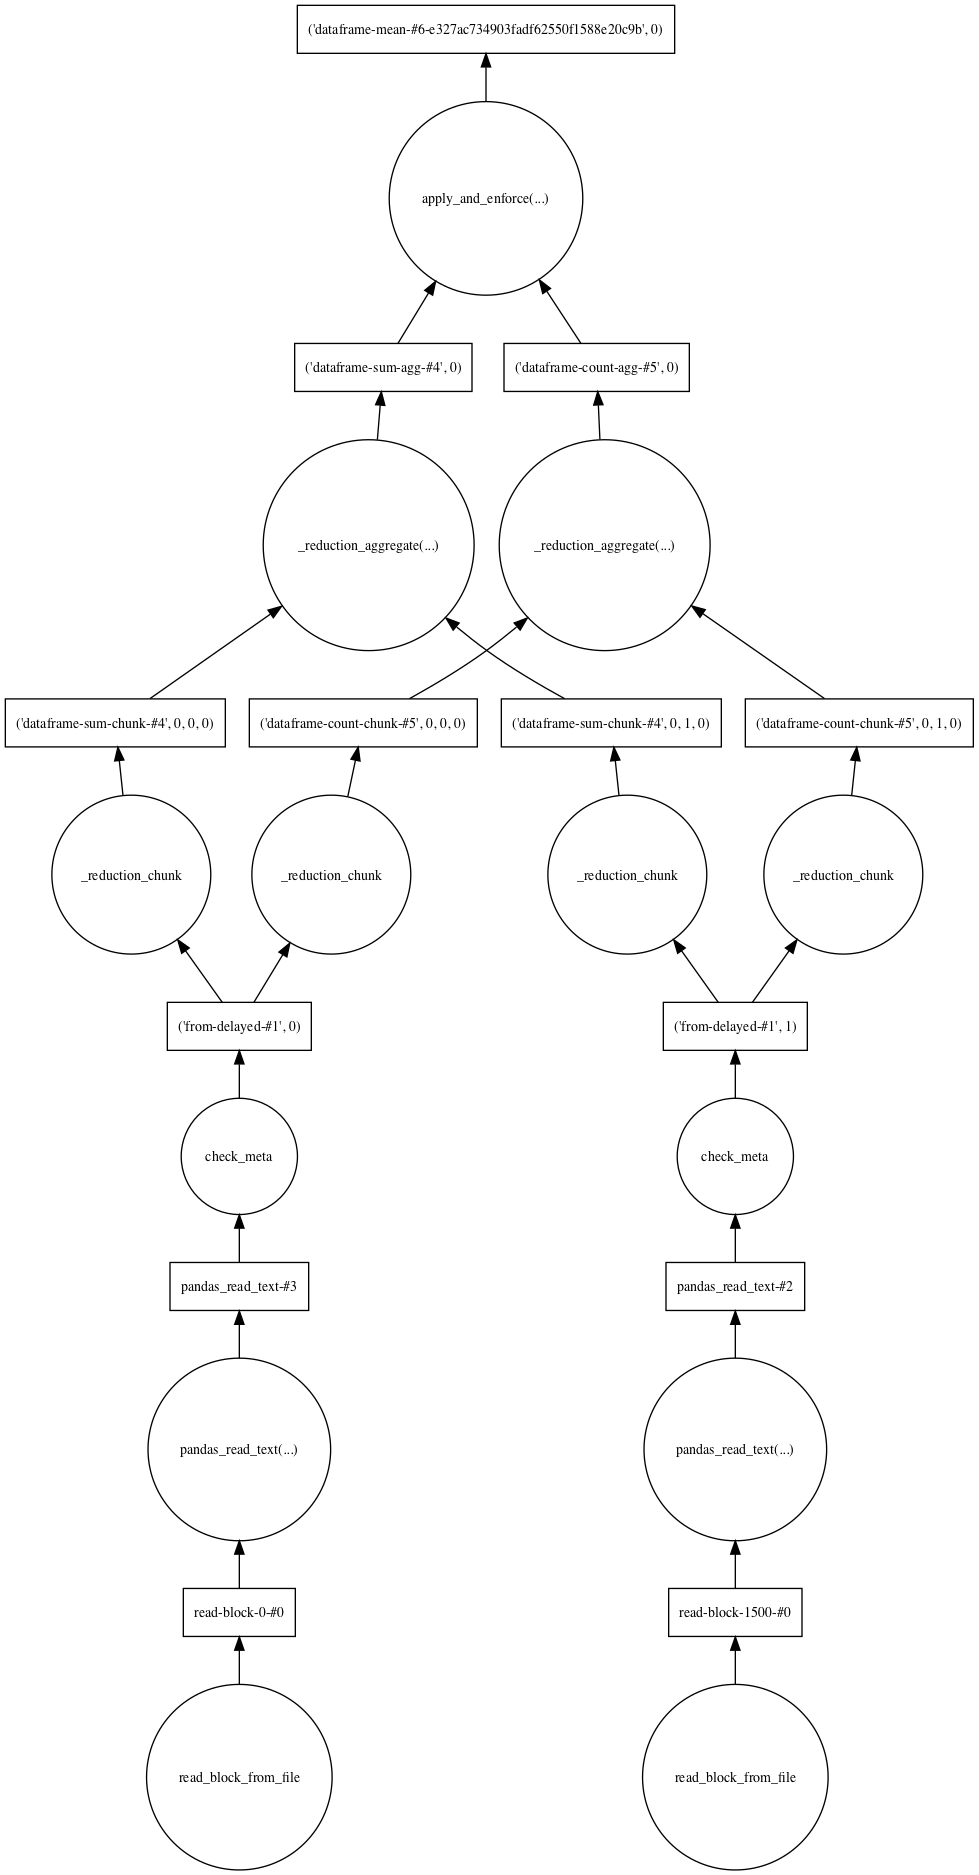

In [77]:
ddf2.mean().visualize()